# Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats 
%matplotlib inline

# Panel A

In [15]:
# raw data
raw_0_enz = np.array([0.093800001, 0.091300003, 0.089100003, 0.091200002, 0.089000002, 0.093199998])
raw_0_noenz = np.array([0.077600002 , 0.073899999, 0.075099997, 0.075000003, 0.076499999, 0.074299999])
raw_10_enz = np.array([0.060199998, 0.0579, 0.058400001, 0.061900001, 0.061799999, 0.060800001])
raw_10_noenz = np.array([0.057599999, 0.056000002, 0.056499999, 0.056699999, 0.056200001, 0.0561])
raw_30_enz = np.array([0.056400001, 0.057, 0.0561, 0.067500003, 0.057599999, 0.059799999])
raw_30_noenz = np.array([0.056200001, 0.054200001, 0.0546, 0.057399999, 0.056200001, 0.056200001])
raw_50_enz = np.array([0.057100002, 0.055300001, 0.054900002, 0.054000001, 0.057700001, 0.059])
raw_50_noenz = np.array([0.056699999, 0.0568, 0.054200001, 0.056699999, 0.055100001, 0.0559])
raw_50_enz = np.array([0.057100002, 0.055300001, 0.054900002,  0.057700001, 0.059])
raw_50_noenz = np.array([0.056699999, 0.0568, 0.054200001,  0.055100001, 0.0559])


time = [1,10,30,50]

# Cell OD for the timepoints
ODs = np.array([0.02, 0.031, 0.031,0.031])*8

In [16]:
# correct data substract noenz from enz
# devide by timepoint 0 to get relative 
corr_0 = (raw_0_enz-raw_0_noenz )/ODs[0]
corr_10 = (raw_10_enz-raw_10_noenz)/ODs[1]
corr_30 = (raw_30_enz-raw_30_noenz)/ODs[2]
corr_50 = (raw_50_enz-raw_50_noenz)/ODs[3]

mean = [np.mean(corr_0),np.mean(corr_10),np.mean(corr_30),np.mean(corr_50)]
rel_0 = corr_0/mean[0]
rel_10 = corr_10/mean[0]
rel_30 = corr_30/mean[0]
rel_50 =corr_50/mean[0]

all_data_mean = np.array([np.mean(rel_0),np.mean(rel_10),np.mean(rel_30),np.mean(rel_50)]) *100

all_data_stderr = np.array([stats.sem(rel_0),stats.sem(rel_10),stats.sem(rel_30),stats.sem(rel_50)]) *100

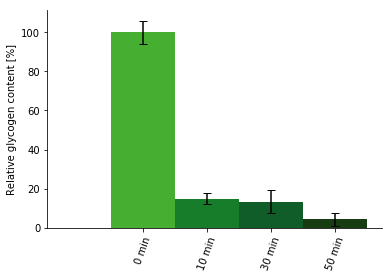

In [17]:
fig, ax = plt.subplots()
ind = np.arange(1)  # the x locations for the groups
width = 0.2       # the width of the bars

rects1 = ax.bar(ind , all_data_mean[0], width, color='#46AE31', yerr=all_data_stderr[0] , capsize = 4)
rects1 = ax.bar(0.3,0)

rects2 = ax.bar(ind + 1*width, all_data_mean[1], width, color='#187D2A', yerr=all_data_stderr[1], capsize = 4)
rects2 = ax.bar(0.15,0)

rects3 = ax.bar(ind + 2*width, all_data_mean[2], width, color='#105D2A', yerr=all_data_stderr[2], capsize = 4)

rects4 = ax.bar(ind + 3*width, all_data_mean[3], width, color='#183C11', yerr=all_data_stderr[3], capsize = 4)

# add some text for labels, title and axes ticks
plt.xticks(rotation=70)
ax.set_ylabel(u'Relative glycogen content [%]')
ax.set_xticks([ind, ind+width, ind + 2*width, ind + 3*width] )
ax.set_xticklabels(['0 min', '10 min', '30 min', '50 min'])


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('Figure2_PanelA.pdf', bbox_inches='tight' )

# Panel B 

In [8]:
time = np.array([0, 2, 5])

OD_1 = np.array([0.82,0.77,0.76])
OD_2 = np.array([0.86,0.81,0.83])
OD_3 = np.array([0.82,0.79,0.77])
supernatant_no_enz_1 = np.array([7105,5801,6632])
supernatant_no_enz_2 = np.array([7570,6084,5869])
supernatant_no_enz_3 = np.array([9671,6696,7546])
supernatant_enz_1 = np.array([6656,7139,7712])
supernatant_enz_2 = np.array([7878,7913,7308])
supernatant_enz_3 = np.array([9929,7901,8564])


In [11]:
# substract no enz from enz
diff_1 = supernatant_enz_1 - supernatant_no_enz_1
diff_2 = supernatant_enz_2 - supernatant_no_enz_2
diff_3 = supernatant_enz_3 - supernatant_no_enz_3

# normalize to OD
diff_norm_1 = diff_1 / OD_1
diff_norm_2 = diff_2 / OD_2
diff_norm_3 = diff_3 / OD_3

# get average and std
#divide by fluo per glyc to get total content
average = np.array([np.mean([diff_1[i], diff_2[i], diff_3[i]]) for i in range(len(time))]) 
std = np.array([np.std([diff_1[i], diff_2[i], diff_3[i]]) for i in range(len(time))] )

# make relative to highest value
average_rel = average*100 / average[1]
std_rel = std*100 / average[1]

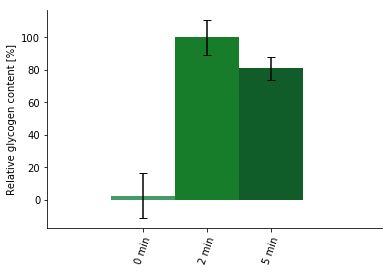

In [10]:
fig, ax = plt.subplots()
ind = np.arange(1)  # the x locations for the groups
width = 0.2       # the width of the bars

rects1 = ax.bar(ind , average_rel[0], width, color='#439C68', yerr=std_rel[0]/np.sqrt(3) , capsize = 4)
rects1 = ax.bar(0.3,0)

rects2 = ax.bar(ind + 1*width, average_rel[1], width, color='#187D2A', yerr=std_rel[1]/np.sqrt(3), capsize = 4)
rects2 = ax.bar(0.15,0)

rects3 = ax.bar(ind + 2*width, average_rel[2], width, color='#105D2A', yerr=std_rel[2]/np.sqrt(3), capsize = 4)

# add some text for labels, title and axes ticks
plt.xticks(rotation=70)
ax.set_ylabel(u'Relative glycogen content [%]')
ax.set_xticks([ind, ind+width, ind + 2*width] )
ax.set_xticklabels(['0 min', '2 min', '5 min'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('Figure2_PanelB.pdf', bbox_inches='tight' )